In [62]:
import warnings
import time
import pandas as pd
from tqdm import tqdm

from helpers import classification as pf
from helpers import stats as bf
from helpers.file import save_file
from helpers.simulation_logger import SimulationLogger
from helpers.model_config import custom_models_config

warnings.filterwarnings("ignore")

start_time = time.time()

In [63]:
league = "usa-mls"
start_season = 2012
save_pipeline_bool = True
random_state = 0

min_games_played = 10
min_games_played_at = 5

betting_starts_after_n_games = 0

filtered_cols = [
    'home_points_pct', 
    'home_win_pct', 'home_draw_pct', 'home_loss_pct',
    'home_points_pct_last_games',
    # 'home_win_pct_last_games', 'home_draw_pct_last_games', 'home_loss_pct_last_games',
    'home_home_win_pct', 'home_home_draw_pct', 'home_home_loss_pct',
    'home_team_xg', 'home_opp_xg',
    'home_team_score', 'home_opp_score',
    'home_home_team_xg', 'home_home_opp_xg',
    'home_home_team_score', 'home_home_opp_score',
    'away_points_pct', 
    'away_win_pct', 'away_draw_pct', 'away_loss_pct',
    'away_points_pct_last_games',
    # 'away_win_pct_last_games', 'away_draw_pct_last_games', 'away_loss_pct_last_games',
    'away_away_win_pct', 'away_away_draw_pct', 'away_away_loss_pct',
    'away_team_xg', 'away_opp_xg',
    'away_team_score', 'away_opp_score',
    'away_away_opp_xg', 'away_away_team_xg',
    'away_away_opp_score', 'away_away_team_score', 
    'home_elo', 'away_elo',
    'home_odds', 'away_odds', 'draw_odds',
    "home_ahc_odds",
    "ahc_line",
    "away_ahc_odds",
    "overs_odds",
    "totals_line",
    "unders_odds",
]

# Market configurations for different bet types
# Each market has a list of possible outcomes, a threshold for betting, and a list of models to use in the VotingClassifier
markets = {
    "result": [["H", "D", "A"], 2.2, ["random_forest", "naive_bayes", "logistic_regression"]],
    "ahc_result": [["H", "A", "P"], 1.9, ["random_forest", "svm"]],
    "totals_result": [["O", "U", "P"], 1.8, ["knn", "naive_bayes"]]
}

fast_simulation = True
preprocess = False
bankroll = 900
strategy = "default"
default_value = 1
default_bankroll_pct = 0.05

plot_threshold = 0

In [64]:
# Initialize logger
logger = SimulationLogger(league)

# Log all configuration parameters
logger.log_config(
    league=league,
    start_season=start_season,
    save_pipeline=save_pipeline_bool,
    random_state=random_state,
    min_games_played=min_games_played,
    min_games_played_at=min_games_played_at,
    betting_starts_after_n_games=betting_starts_after_n_games,
    filtered_cols=filtered_cols,
    markets=markets,
    fast_simulation=fast_simulation,
    preprocess=preprocess,
    bankroll=bankroll,
    strategy=strategy,
    default_value=default_value,
    default_bankroll_pct=default_bankroll_pct,
    plot_threshold=plot_threshold,
    custom_models_config=custom_models_config if 'custom_models_config' in globals() else None
)

📁 Simulation directory created: ../dist/simulations\usa-mls\2025-08-28_10-21-02


In [65]:
matches, _ = bf.initialize_matches(league, start_season)
display(matches)

Generating teams ELOs...


100%|██████████| 5625/5625 [00:00<00:00, 7766.46it/s]

Successfully generated teams ELOs.


,season,date,week,home_team,home_xg,home_score,away_score,away_xg,away_team,league,...,ahc_line,away_ahc_odds,overs_odds,totals_line,unders_odds,result,ahc_result,totals_result,home_elo,away_elo
0,2012,2012-03-10,Regular Season,Colorado Rapids,NaN,2,0,NaN,Columbus Crew,usa-mls,...,0.50,1.85,2.00,2.25,1.85,H,H,U,1500.00,1500.00
1,2012,2012-03-10,Regular Season,D.C. United,NaN,0,1,NaN,Sporting KC,usa-mls,...,0.00,2.05,2.05,2.50,1.80,A,A,U,1500.00,1500.00
2,2012,2012-03-10,Regular Season,LA Galaxy,NaN,1,3,NaN,Real Salt Lake,usa-mls,...,0.75,1.80,1.85,2.25,2.00,A,A,O,1500.00,1500.00
3,2012,2012-03-10,Regular Season,SJ Earthquakes,NaN,1,0,NaN,NE Revolution,usa-mls,...,0.75,1.78,2.05,2.50,1.80,H,H,U,1500.00,1500.00
4,2012,2012-03-10,Regular Season,Vancouver W'caps,NaN,2,0,NaN,Montreal Impact,usa-mls,...,0.50,1.78,2.10,2.50,1.78,H,H,U,1500.00,1500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620,2025,2025-07-26,Sat,Inter Miami,1.4,0,0,1.1,FC Cincinnati,usa-mls,...,0.75,1.88,1.80,3.25,2.00,D,A,U,1638.17,1594.31
5621,2025,2025-07-26,Sat,Philadelphia Union,3.9,3,1,0.6,Colorado Rapids,usa-mls,...,1.00,1.80,1.85,2.75,1.95,H,H,O,1602.30,1451.79
5622,2025,2025-07-26,Sat,Real Salt Lake,1.2,2,1,1.4,SJ Earthquakes,usa-mls,...,0.50,1.90,1.80,2.75,2.00,H,H,O,1506.82,1432.62
5623,2025,2025-07-26,Sat,St. Louis,1.6,1,2,1.9,Minnesota Utd,usa-mls,...,0.00,1.78,1.85,2.75,1.95,A,A,O,1398.38,1574.57


In [66]:
data_model = []

for index, game in tqdm(matches.iterrows(), total=len(matches)):
    if pd.isnull(game["home_odds"]):
        continue

    home_stats_dict = bf.get_team_previous_games_stats(
        game["home_team"], game["season"], game["date"], "H", min_games_played, min_games_played_at, matches
    )
    if not home_stats_dict:
        continue

    away_stats_dict = bf.get_team_previous_games_stats(
        game["away_team"], game["season"], game["date"], "A", min_games_played, min_games_played_at, matches
    )
    if not away_stats_dict:
        continue

    game_info_keys = [
        "date",
        "season",
        "home_team",
        "away_team",
        "home_odds",
        "away_odds",
        "draw_odds",
        "result",
        "ahc_result",
        "totals_result",
        "home_score",
        "away_score",
        "home_elo",
        "away_elo",
        "home_ahc_odds",
        "ahc_line",
        "away_ahc_odds",
        "overs_odds",
        "totals_line",
        "unders_odds",
    ]
    game_info_dict = {key: game[key] for key in game_info_keys}

    data_model.append({**home_stats_dict, **away_stats_dict, **game_info_dict})

data_df = pd.DataFrame(data_model)

100%|██████████| 5625/5625 [02:04<00:00, 45.18it/s] 


In [67]:
display(data_df)

,home_points_pct,home_win_pct,home_draw_pct,home_loss_pct,home_points_pct_last_games,home_win_pct_last_games,home_draw_pct_last_games,home_loss_pct_last_games,home_home_win_pct,home_home_draw_pct,...,home_score,away_score,home_elo,away_elo,home_ahc_odds,ahc_line,away_ahc_odds,overs_odds,totals_line,unders_odds
0,0.500000,0.416667,0.250000,0.333333,0.600000,0.500000,0.300000,0.200000,0.500000,0.333333,...,2,0,1518.68,1508.29,1.80,0.25,2.00,2.00,2.50,1.85
1,0.500000,0.400000,0.300000,0.300000,0.500000,0.400000,0.300000,0.300000,0.400000,0.400000,...,2,1,1504.15,1457.90,1.90,0.50,1.95,2.10,2.50,1.78
2,0.333333,0.272727,0.181818,0.545455,0.366667,0.300000,0.200000,0.500000,0.333333,0.166667,...,2,3,1469.21,1558.78,1.78,0.25,2.10,1.95,2.50,1.90
3,0.694444,0.666667,0.083333,0.250000,0.833333,0.800000,0.100000,0.100000,0.800000,0.200000,...,1,1,1554.99,1475.20,2.02,1.00,1.82,1.93,2.50,1.93
4,0.696970,0.636364,0.181818,0.181818,0.629630,0.555556,0.222222,0.222222,0.714286,0.000000,...,0,2,1555.92,1484.58,2.00,1.00,1.85,2.00,2.50,1.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3679,0.650794,0.571429,0.238095,0.190476,0.733333,0.700000,0.100000,0.200000,0.600000,0.200000,...,0,0,1638.17,1594.31,1.93,0.75,1.88,1.80,3.25,2.00
3680,0.652778,0.583333,0.208333,0.208333,0.600000,0.500000,0.300000,0.200000,0.666667,0.250000,...,3,1,1602.30,1451.79,2.00,1.00,1.80,1.85,2.75,1.95
3681,0.405797,0.347826,0.173913,0.478261,0.466667,0.400000,0.200000,0.400000,0.454545,0.090909,...,2,1,1506.82,1432.62,1.90,0.50,1.90,1.80,2.75,2.00
3682,0.260870,0.173913,0.260870,0.565217,0.266667,0.200000,0.200000,0.600000,0.272727,0.363636,...,1,2,1398.38,1574.57,2.03,0.00,1.78,1.85,2.75,1.95


In [68]:
last_season = matches.iloc[-1]["season"]

# Prepare a list of function calls for each season
function_calls = []

for season in range(start_season + 1, last_season + 1):
    for result_col, market_values in markets.items():
        class_order, _, voting_models = market_values

        matches_filtered = pf.get_filtered_matches(
            data_df,
            filtered_cols,
            start_season,
            season
        )

        if not len(matches_filtered[matches_filtered["season"] < season]):
            continue

        # Store a tuple with season, result_col, and a lambda function
        function_calls.append((
            season,
            result_col,
            lambda season=season, result_col=result_col, class_order=class_order: pf.simulate_with_classification(
                data_df,
                start_season,
                season,
                filtered_cols,
                random_state=random_state,
                preprocess=preprocess,
                result_col=result_col,
                class_order=class_order,
                fast_simulation=fast_simulation,
                custom_models_config=custom_models_config,
                voting_models=voting_models,
            )
        ))

# Train and evaluate model
print("Training and evaluating models throughout the seasons...")
last_season_models = {}

# Initialize matches outside the loop
matches = data_df.copy()

for season, result_col, func in tqdm(function_calls):
    season_matches, trained_models = func()
    
    # Update the main matches dataframe with new values
    for col in season_matches.columns:
        # Only update rows that exist in matches
        matches.loc[season_matches.index, col] = season_matches[col]

    if season == last_season:
        last_season_models[result_col] = trained_models

Training and evaluating models throughout the seasons...


100%|██████████| 21/21 [02:10<00:00,  6.20s/it]


In [69]:
# Replace the model accuracy cell with:

models = pf.get_classification_models()

def show_all_accuracies():
    print("1x2 Model Accuracies:")
    pf.show_classification_accuracies(matches, models, result_col="result")
    
    print("\nAHC Model Accuracies:")
    pf.show_classification_accuracies(matches, models, result_col="ahc_result")
    
    print("\nTotals Models Accuracies:")
    pf.show_classification_accuracies(matches, models, result_col="totals_result")

# Capture and save the accuracy outputs
logger.capture_print(show_all_accuracies, "Model Accuracies Comparison")

# Also save to dedicated file
logger.save_model_accuracies(matches, models, markets)

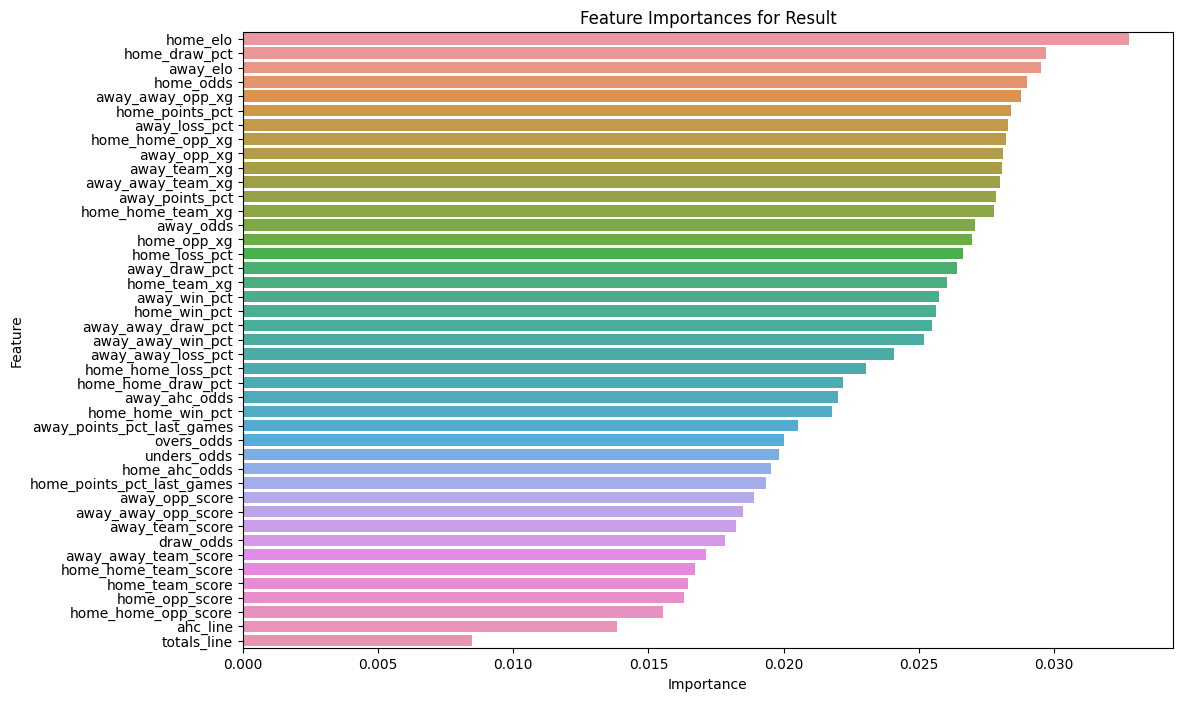

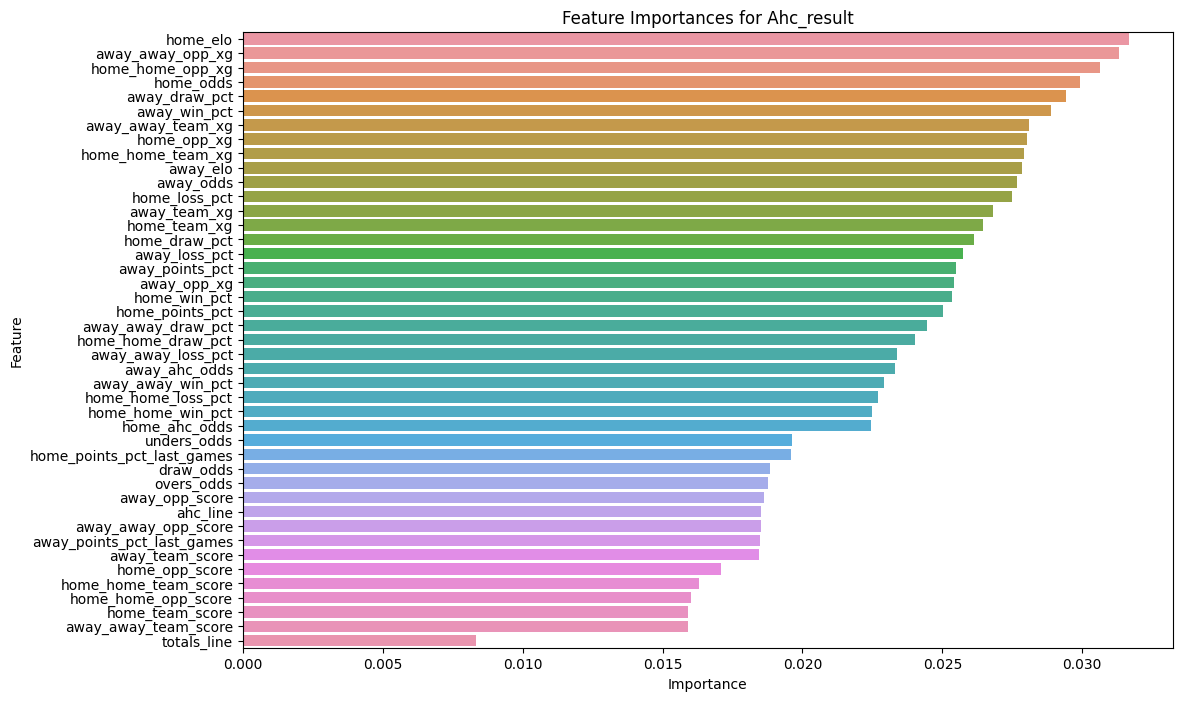

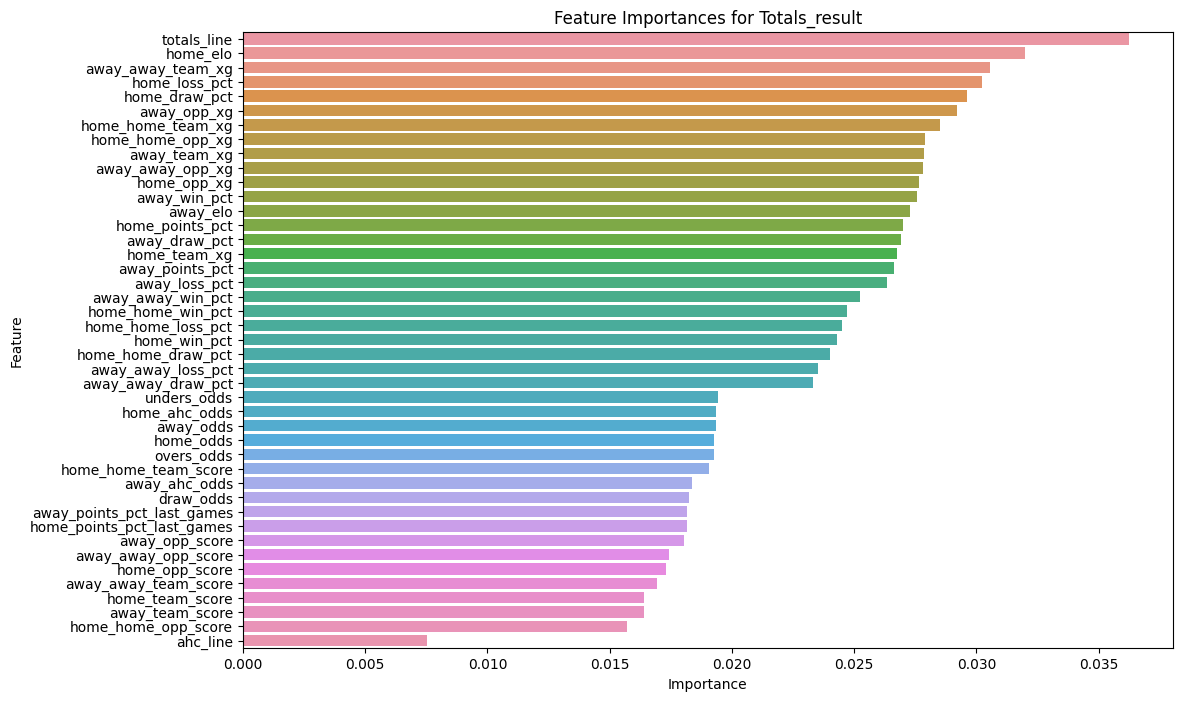

In [70]:
# Replace feature importance cell with:

def show_feature_importances():
    return pf.display_random_forest_feature_importances(last_season_models, filtered_cols, logger=logger)

# Capture output and save ALL charts
logger.capture_print(show_feature_importances, "Random Forest Feature Importances")

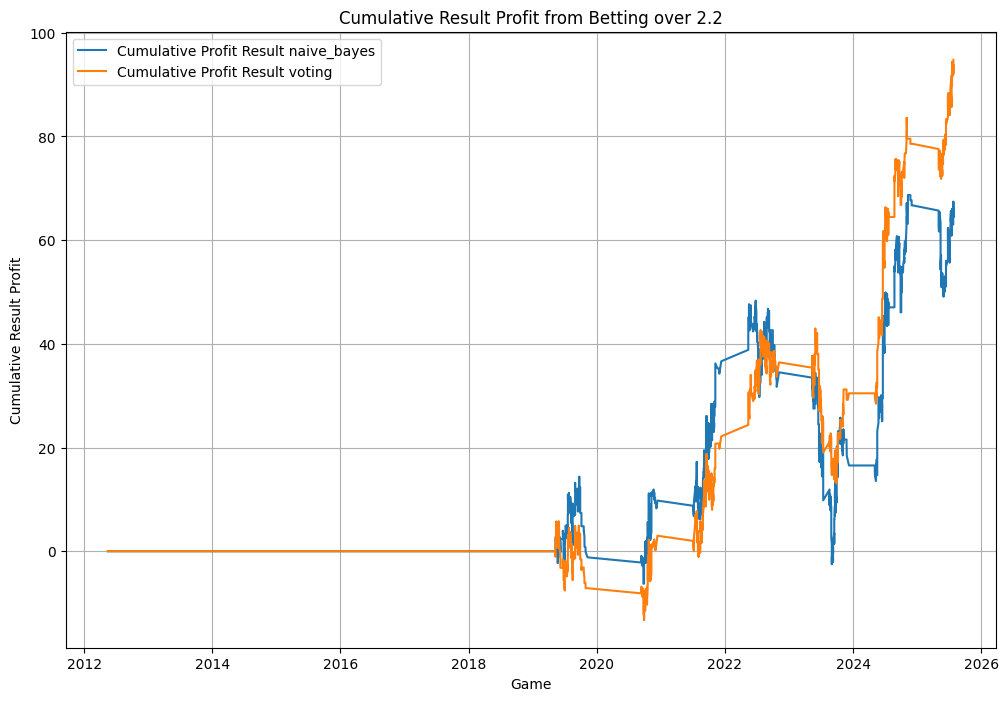

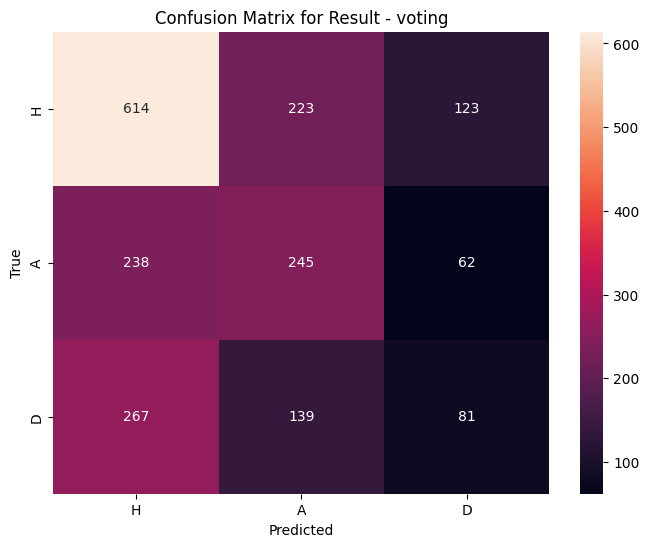

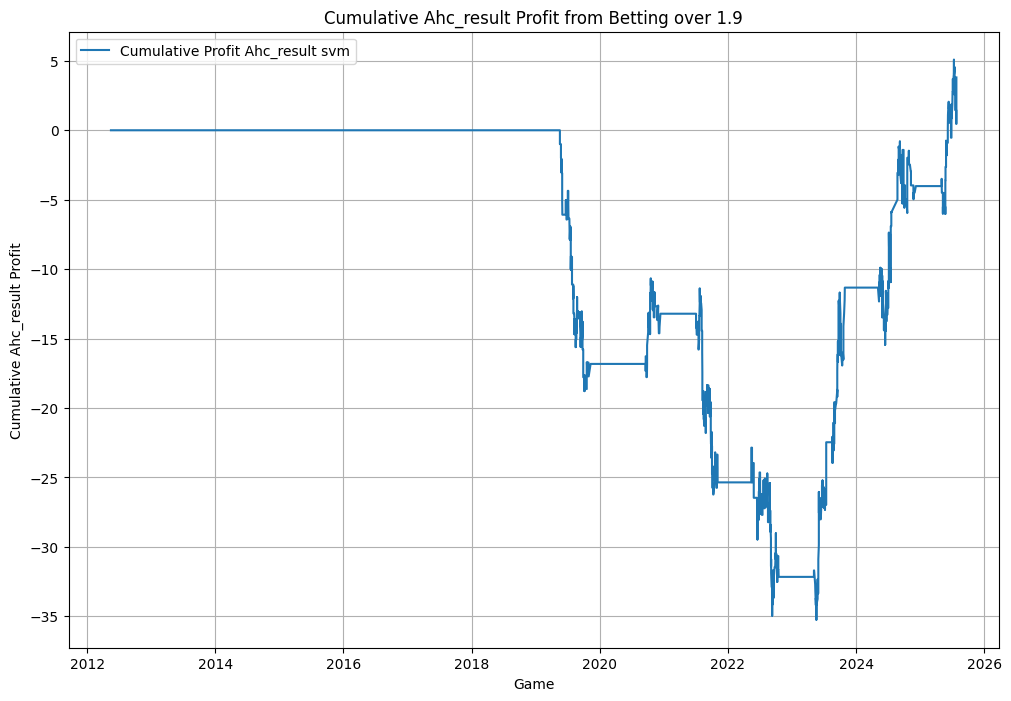

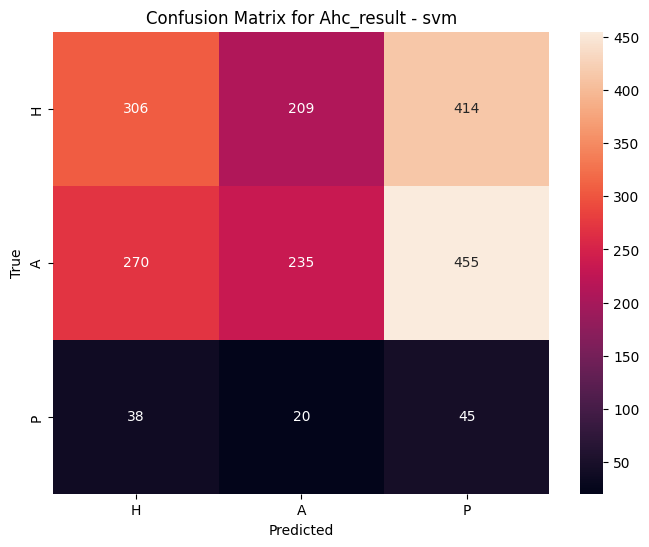

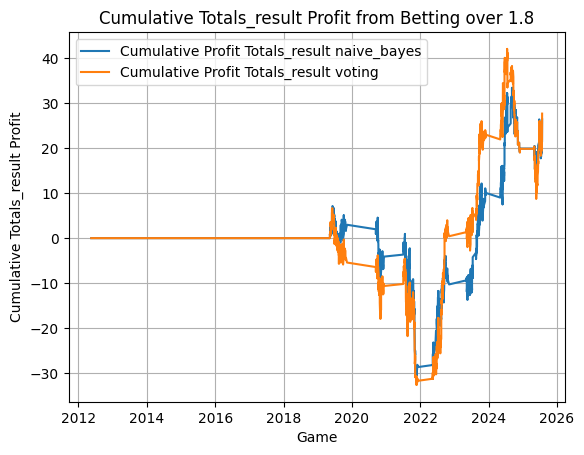

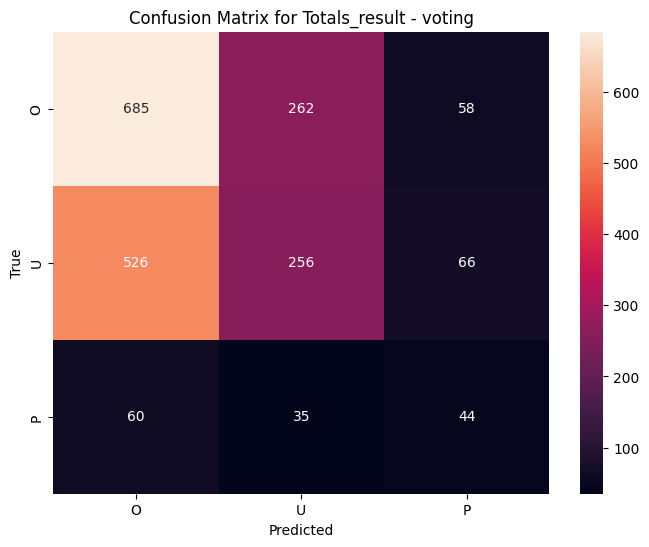

In [75]:
# Replace the profit analysis cell with:

min_odds_1x2 = markets["result"][1]
min_odds_ahc = markets["ahc_result"][1]
min_odds_totals = markets["totals_result"][1]

def run_profit_analysis():
    return pf.get_classification_simulation_results(
        matches,
        start_season,
        plot_threshold,
        bankroll,
        strategy,
        default_value,
        default_bankroll_pct,
        min_odds_1x2,
        min_odds_ahc,
        min_odds_totals,
        logger=logger,
        voting_models=voting_models
    )

# Capture profit analysis
best_models = logger.capture_print(run_profit_analysis, "Profit Analysis and Model Performance")
best_1x2_model, best_ahc_model, best_totals_model = best_models

In [76]:
# Save detailed model parameters
logger.save_model_parameters(last_season_models, markets)

# Capture the model parameters output as well
def show_model_params():
    for market_name, models in last_season_models.items():
        print(f"\n{'='*50}")
        print(f"MARKET: {market_name.upper()}")
        print(f"{'='*50}")
        
        for model_name, model_info in models.items():
            print(f"\nModel: {model_info['estimator'].__class__.__name__}")
            print(f"Model Key: {model_name}")
            print(f"Score: {model_info.get('score')}")
            print(f"Parameters: {model_info.get('params')}")
            
            if "pipeline" in model_info:
                pipeline_steps = list(model_info["pipeline"].named_steps.keys())
                print(f"Pipeline Steps: {pipeline_steps}")
                
                # Show model step parameters
                model_step = model_info["pipeline"].named_steps.get("model")
                if model_step:
                    print(f"Model Step Parameters: {model_step.get_params()}")
            print("-" * 40)

# Capture model parameters output
logger.capture_print(show_model_params, "Detailed Model Parameters for All Markets")

🔧 Model parameters saved: model_parameters.json


In [77]:
# Create simulation summary
simulation_summary = {
    "simulation_info": {
        "league": league,
        "start_season": start_season,
        "end_season": matches['season'].max(),
        "total_matches": len(matches),
        "total_function_calls": len(function_calls),
        "execution_time": "N/A"  # You could add timing
    },
    "best_models": {
        "result": best_1x2_model,
        "ahc_result": best_ahc_model, 
        "totals_result": best_totals_model
    },
    "final_bankroll": {
        "result": matches[f'CumulativeProfitML_{best_1x2_model}'].iloc[-1] if f'CumulativeProfitML_{best_1x2_model}' in matches.columns else None,
        "ahc_result": matches[f'CumulativeProfitML_{best_ahc_model}'].iloc[-1] if f'CumulativeProfitML_{best_ahc_model}' in matches.columns else None,
        "totals_result": matches[f'CumulativeProfitML_{best_totals_model}'].iloc[-1] if f'CumulativeProfitML_{best_totals_model}' in matches.columns else None,
    },
    "model_performance": {
        model_name: {
            "accuracy": models[model_name].get("score"),
            "params": models[model_name].get("params")
        } for model_name in models.keys()
    },
    "last_season_models_summary": {
        market: {
            model_name: {
                "estimator": model_info["estimator"].__class__.__name__,
                "score": model_info.get("score"),
                "params": model_info.get("params")
            }
            for model_name, model_info in market_models.items()
        }
        for market, market_models in last_season_models.items()
    }
}

execution_time = time.time() - start_time
simulation_summary["simulation_info"]["execution_time"] = f"{execution_time:.2f} seconds"

# Finalize logging
logger.finalize(simulation_summary)

print(f"\n🎉 Simulation complete! All results saved to:")
print(f"📁 {logger.simulation_dir}")

✅ Simulation logged to: ../dist/simulations\usa-mls\2025-08-28_10-21-02

🎉 Simulation complete! All results saved to:
📁 ../dist/simulations\usa-mls\2025-08-28_10-21-02


In [78]:
def save_pipeline(market_str, last_season_models, best_model_name):
    pipeline = last_season_models[market_str][best_model_name].get("pipeline")
    
    data = {
        "pipeline": pipeline,
        "best_model_name": best_model_name,
        "min_games_played": min_games_played,
        "min_games_played_at": min_games_played_at,
        "markets": markets,
        "filtered_cols": filtered_cols,
        "strategy": strategy,
        "default_value": default_value,
        "default_bankroll_pct": default_bankroll_pct
    }

    path = f"../dist/betting/{league}"
    save_file(path, data, market_str)

# Save the pipeline
if save_pipeline_bool:
    save_pipeline("result", last_season_models, best_1x2_model)
    save_pipeline("ahc_result", last_season_models, best_ahc_model)
    save_pipeline("totals_result", last_season_models, best_totals_model)